In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from P201_Functions import *

In [2]:
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x
    #return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x+par[4]*x*x*x*x+par[5]*x*x*x*x*x+par[6]*x*x*x*x*x*x+par[7]*x*x*x*x*x*x*x

par = []
par.append(1.80)
par.append(-4.05)
par.append(0.40)
par.append(1.0000)
#par.append(0.0)
#par.append(0.0)
#par.append(0.0)
#par.append(0.0)
par = np.array(par)

In [3]:
m = 3 #Set the order of the polynomial
n = 17 #Set the number of data points

walki = np.array([-1,1,-.5,.5,0,-1,1,-.5,.5,0,-1,1,-.5,.5,0,0.1,0.1])
sigmai = np.array([1,1,1,2,2,2,1,1,1,2,2,2,1,1,1,3,1])

In [4]:
xl = -3.0
xh = 3.0

xi = []
yi = []
exi = []
eyi = []

for i in range(0,n):
    xi.append(xl+(xh-xl)*i/n)
    yi.append(generator_function(xi[i],*par)+0.5*walki[i])
    exi.append(0.0)
    eyi.append(sigmai[i])
    
xi = np.array(xi)
yi = np.array(yi)
exi = np.array(exi)
eyi = np.array(eyi)

In [5]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [6]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+yi[i]*math.pow(xi[i],k)/math.pow(eyi[i],2)
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(xi[i],k+j)/math.pow(eyi[i],2)
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[  11.61111111   -2.65686275   39.99480969  -28.45847751]
 [  -2.65686275   39.99480969  -28.45847751  239.4407215 ]
 [  39.99480969  -28.45847751  239.4407215  -269.5075902 ]
 [ -28.45847751  239.4407215  -269.5075902  1671.01567099]]
Constant matrix:
[[ 19.44279604]
 [ 62.00359635]
 [ 12.26666553]
 [550.55987497]]
Inverse matrix
[[ 0.21290945  0.01710559 -0.03935136 -0.00517182]
 [ 0.01710559  0.19522719 -0.01321104 -0.02981361]
 [-0.03935136 -0.01321104  0.01289688  0.0033029 ]
 [-0.00517182 -0.02981361  0.0033029   0.00531507]]
Diagonal Check:
[[ 1.00000000e+00 -3.88404389e-18  1.02861408e-16 -1.49543656e-18]
 [-1.03451293e-16  1.00000000e+00  1.17564518e-16  2.54972834e-16]
 [-2.89304400e-16  9.97777173e-17  1.00000000e+00 -5.05675253e-17]
 [ 3.15059052e-16 -4.12527896e-15 -4.77972604e-16  1.00000000e+00]]
Coefficients:
[[ 1.87005872]
 [-4.13886676]
 [ 0.3924109 ]
 [ 1.01767439]]


In [7]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(xi[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,yi[j],yfit))
    error_sum = error_sum + math.pow(((yfit-yi[j])/eyi[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = -9.950000  yfit = -9.658851
i = 1  y = -2.724374  yfit = -3.300076
i = 2  y = 0.872481  yfit = 1.143071
i = 3  y = 4.104356  yfit = 3.939041
i = 4  y = 5.235040  yfit = 5.356287
i = 5  y = 5.028323  yfit = 5.663261
i = 6  y = 5.497995  yfit = 5.128416
i = 7  y = 3.657847  yfit = 4.020203
i = 8  y = 2.771667  yfit = 2.607075
i = 9  y = 1.103246  yfit = 1.157484
i = 10  y = -0.583625  yfit = -0.060118
i = 11  y = -0.275158  yfit = -0.777278
i = 12  y = -0.957562  yfit = -0.725544
i = 13  y = 0.632953  yfit = 0.363536
i = 14  y = 2.760177  yfit = 2.758415
i = 15  y = 6.737899  yfit = 6.727545
i = 16  y = 12.479910  yfit = 12.539377
chi2/dof = 1.157945 / 13.000000


In [8]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 1.870059 +/- 0.461421
p1 = -4.138867 +/- 0.441845
p2 = 0.392411 +/- 0.113564
p3 = 1.017674 +/- 0.072905


[[ 0.21290946  0.01710559 -0.03935136 -0.00517182]
 [ 0.01710559  0.1952272  -0.01321104 -0.02981362]
 [-0.03935136 -0.01321104  0.01289689  0.0033029 ]
 [-0.00517182 -0.02981362  0.0033029   0.00531507]]

[ 1.87005874 -4.13886676  0.3924109   1.01767439]
[0.46142113 0.44184522 0.11356446 0.07290453]
[-10.45461354 -10.44711068 -10.43914425 ...  18.97707114  18.98558569
  18.99433866]
[-8.87565351 -8.8682679  -8.86087555 ... 21.83261305 21.84225522
 21.8520733 ]


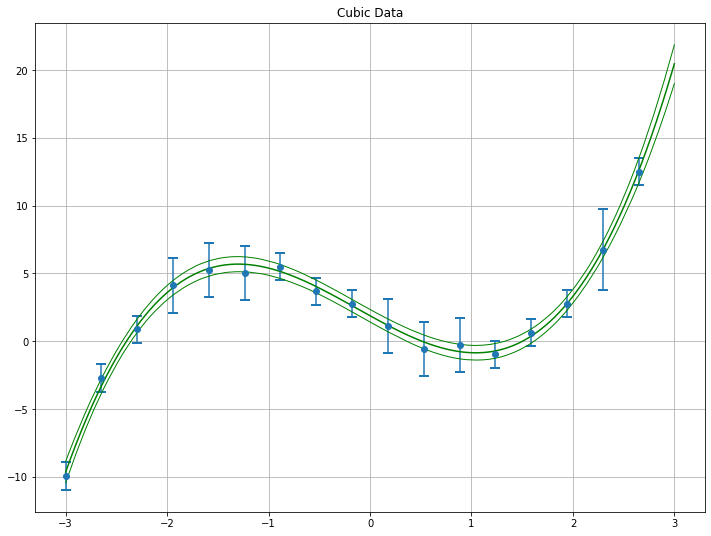

In [9]:
plt.rcParams["figure.figsize"] = (12,9)

figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# Plot the data, with these uncertainties, and give the panel a title.
plot1.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot1.set_title("Cubic Data")

b = np.squeeze(np.asarray(coeff))

npoints = 1000*n
dx = (xh-xl)/npoints

xfitting = []
yfitting = []
for i in range(0,npoints):
    xfitting.append(xl+dx*i)
    yfitting.append(generator_function(xfitting[i],*b))
xfitting = np.array(xfitting)
yfitting = np.array(yfitting)
    
plot1.plot(xfitting,yfitting,'g-')

from scipy.optimize import curve_fit

init_vals = [0.0 for x in range(m+1)]
popt, pcov = curve_fit(generator_function,xi,yi,p0=init_vals,sigma=sigmai,absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print(pcov)
print()
print(popt)
print(perr)

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([generator_function(xfitting,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print (lower)
print (upper)

plot1.plot(xfitting,lower,'g-',linewidth=1)
plot1.plot(xfitting,upper,'g-',linewidth=1)

plt.grid()

Lower:
Found root at  -2.3558823529411765
Found root at  0.35788235294117676
Found root at  1.6178823529411765
Upper:
Found root at  -2.441294117647059
Found root at  0.7224705882352942
Found root at  1.3334117647058825

Root = -2.40 +/- 0.04
Root = 0.54 +/- 0.18
Root = 1.48 +/- 0.14


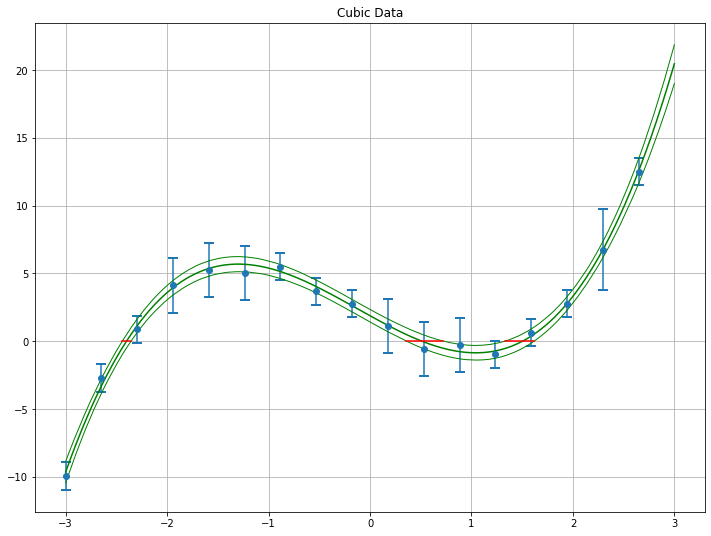

In [10]:
lowerroots = []
upperroots = []

print ("Lower:")
for i in range(npoints-1):
    if (lower[i]*lower[i+1]<0):
        print ("Found root at ",xfitting[i])
        lowerroots.append(xfitting[i])
        
print ("Upper:")
for i in range(npoints-1):
    if (upper[i]*upper[i+1]<0):
        print ("Found root at ",xfitting[i])
        upperroots.append(xfitting[i])
        
print()

for i in range(len(lowerroots)):
    xr = [(lowerroots[i]+upperroots[i])/2.0-np.fabs((lowerroots[i]-upperroots[i])/2.0),(lowerroots[i]+upperroots[i])/2.0+np.fabs((lowerroots[i]-upperroots[i])/2.0)]
    yr = [0,0]
    plot1.plot(xr,yr,'r-')
    print ("Root = %0.2f +/- %0.2f" % ((lowerroots[i]+upperroots[i])/2.0,np.fabs((lowerroots[i]-upperroots[i])/2.0)))
    
figure